# Predictive Modeling and Call Optimization for Bank Marketing Campaigns using Machine Learning

 View dataset

In [1]:
#Dependencies
import pandas as pd

In [2]:
# Load the uploaded CSV file
file_path = r"C:\Users\USER\OneDrive\Desktop\ML_dir\Projects\bank_market\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')  # the bank dataset uses ';' as separator

# Show basic info 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
#Show first few rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape

(41188, 21)

# What we know so far & what we want to look for:

The dataset has 41,188 rows and 21 columns, where:

    - The target for classification is the y column (binary: "yes"/"no").

    - We can have a target for regression (for predicting how many calls it takes to get a "yes") can be modeled using the campaign column.

In [6]:
#Import dependencies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis (EDA)

In [7]:
#Count occurences of "unkown"
(df == 'unknown').sum() 

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# Note:

    In this dataset (bank marketing), "unknown" often appears in fields like:

        - Job

        - Marital

        - Education

        - Contact

        - Default

        - Poutcome

Thus , We will not remove the unknowns like we would NaN ,but rather treat them as a value which can be trained from (in XGboost etc)

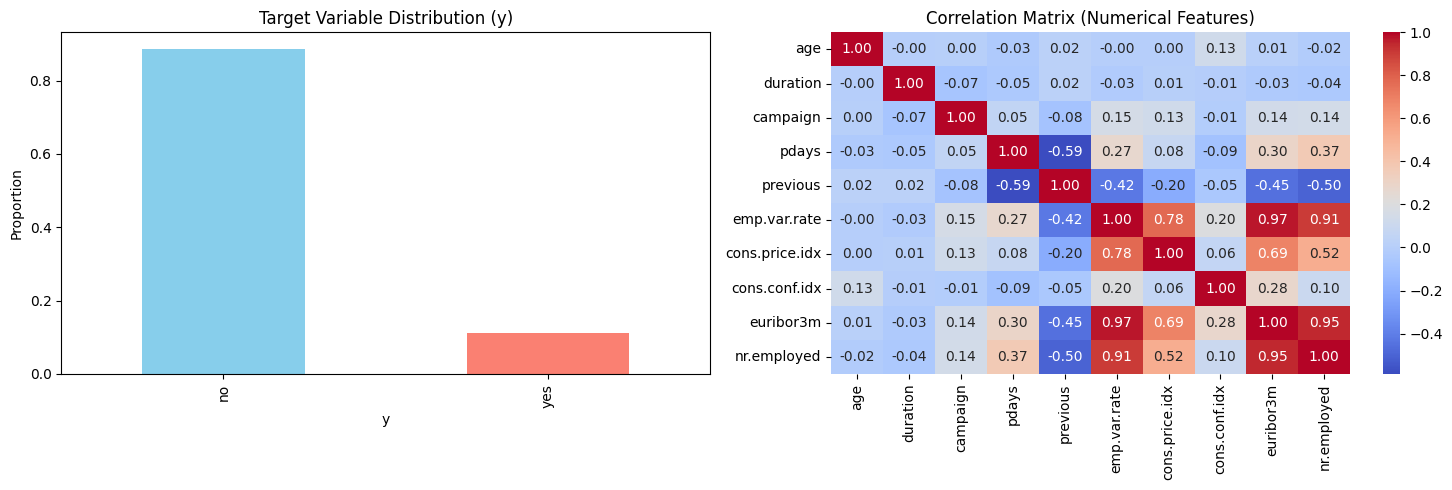

In [8]:
# Target variable distribution
target_distribution = df['y'].value_counts(normalize=True)

# Check correlation among numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plotting the distribution and the heatmap
plt.figure(figsize=(15, 5))

# Target distribution
plt.subplot(1, 2, 1)
target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution (y)')
plt.ylabel('Proportion')

# Correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')

plt.tight_layout()
plt.show()

# Return correlations with campaign to assist regression understanding
correlation_with_campaign = correlation_matrix['campaign'].sort_values(ascending=False)
correlation_with_target = df[numerical_cols].copy()
correlation_with_target['y'] = (df['y'] == 'yes').astype(int)
target_corr = correlation_with_target.corr()['y'].sort_values(ascending=False)



In [9]:
correlation_with_campaign #correlation of other columns with campaign column

campaign          1.000000
emp.var.rate      0.150754
nr.employed       0.144095
euribor3m         0.135133
cons.price.idx    0.127836
pdays             0.052584
age               0.004594
cons.conf.idx    -0.013733
duration         -0.071699
previous         -0.079141
Name: campaign, dtype: float64

In [10]:
target_corr   #correlation of other columns with target "y" column

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

# Train models  

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
import numpy as np



In [12]:
# Encode target for classification
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})

In [13]:
df.head() #check new last column "y_bin"

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [14]:
# Separate features and targets
X = df.drop(columns=['y', 'y_bin'])
y_class = df['y_bin']   # Classification target
y_reg = df['campaign']  # Regression target


In [15]:
y_reg.values

array([1, 1, 1, ..., 2, 1, 3])

In [16]:
y_class.values

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
# Categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
# Handle "unknown" as a separate category in OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols), #scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) #encode categorical columns including "unknown" as a value
    ]
)

# --- Training Classification Models ---

In [21]:
#Create a dictionary with models to be tested
models_class = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

#Split data into training and testing
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

#Create training loop
results_class = {}
for name, model in models_class.items():

    clf_pipeline = Pipeline(steps=[         # make use of Pipeline to train all models at once
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf_pipeline.fit(X_train_c, y_train_c) # train models in pipeline

    preds = clf_pipeline.predict(X_test_c) # make some predications

    probs = clf_pipeline.predict_proba(X_test_c)[:, 1]

    results_class[name] = {   # create a dictionary with model name as key and metrics as values
        'Accuracy': accuracy_score(y_test_c, preds),
        'F1 Score': f1_score(y_test_c, preds),
        'ROC AUC': roc_auc_score(y_test_c, probs)
    }

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# ---Training Regression Models ---


In [22]:
#Create a dictionary with models to be tested
models_reg = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

#Split data into training and testing
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

#Create training loop
results_reg = {}
for name, model in models_reg.items():

    reg_pipeline = Pipeline(steps=[  # make use of Pipeline to train all models at once
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    reg_pipeline.fit(X_train_r, y_train_r)# train models in pipeline

    preds = reg_pipeline.predict(X_test_r) #make some predications

    results_reg[name] = {  # create a dictionary with model name as key and metrics as values
        'MAE': mean_absolute_error(y_test_r, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test_r, preds)), #optionally you can use,  mean_squared_error(y_test_r, preds ,squared=False)
        'R2': r2_score(y_test_r, preds)
    }



In [23]:
results_classification = pd.DataFrame(results_class)
results_classification

,Logistic Regression,Random Forest,XGBoost
Accuracy,0.916606,0.919155,0.917941
F1 Score,0.541082,0.573077,0.606519
ROC AUC,0.942437,0.945612,0.949892


In [24]:
results_regression = pd.DataFrame(results_reg)
results_regression

,Linear Regression,Random Forest Regressor,XGBoost Regressor
MAE,8.735695e-15,0.000402,0.000372
RMSE,1.135980e-14,0.020594,0.011503
R2,1.000000e+00,0.999943,0.999982


- Best Classification Model:  XGBoost
    - It performs best across all three metrics, especially handling the imbalanced data with a higher F1 Score and ROC AUC.

- Best Regression Model:  Linear Regression
    - Lower MAE/RMSE and a good R² = 1.0 , indicating better predictions.

# Visualize results

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


In [26]:
# Re-train best classification model pipeline for plotting (XGBoost)
best_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
best_clf_pipeline.fit(X_train_c, y_train_c)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:13:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'pou...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [27]:
# Predict again for visuals
y_pred = best_clf_pipeline.predict(X_test_c)
y_proba = best_clf_pipeline.predict_proba(X_test_c)[:, 1]#probability to be in class "yes"

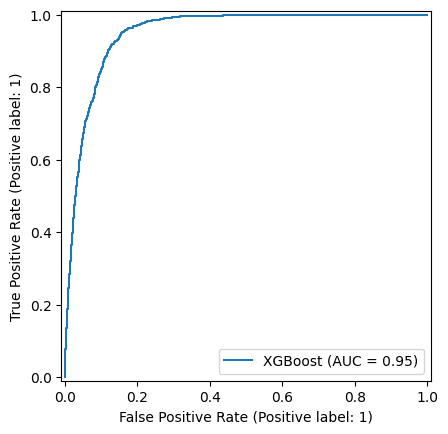

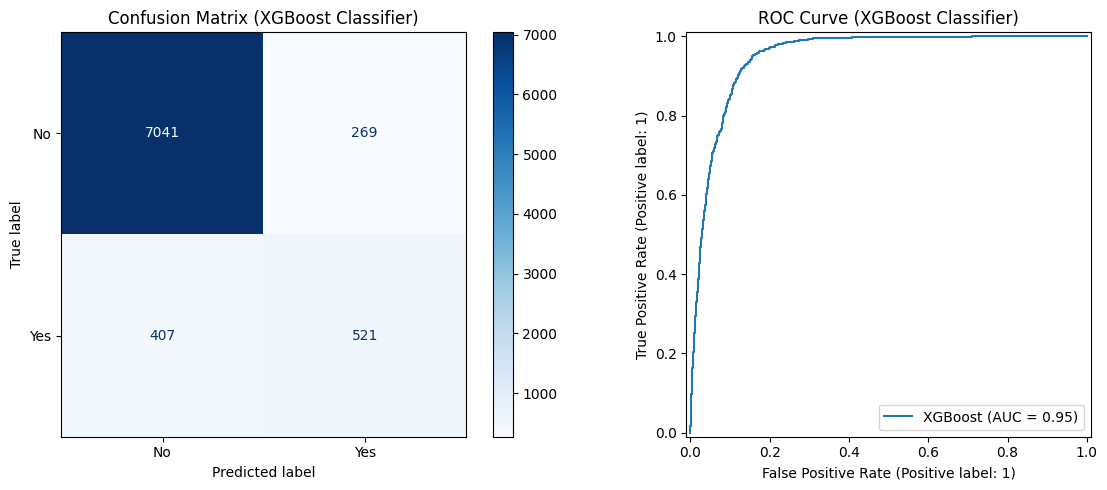

In [28]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred, labels=[0, 1])
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

# Plot ROC Curve
roc_display = RocCurveDisplay.from_predictions(y_test_c, y_proba, name="XGBoost")

# Show plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
disp_cm.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix (XGBoost Classifier)")

plt.subplot(1, 2, 2)
roc_display.plot(ax=plt.gca())
plt.title("ROC Curve (XGBoost Classifier)")

plt.tight_layout()
plt.show()



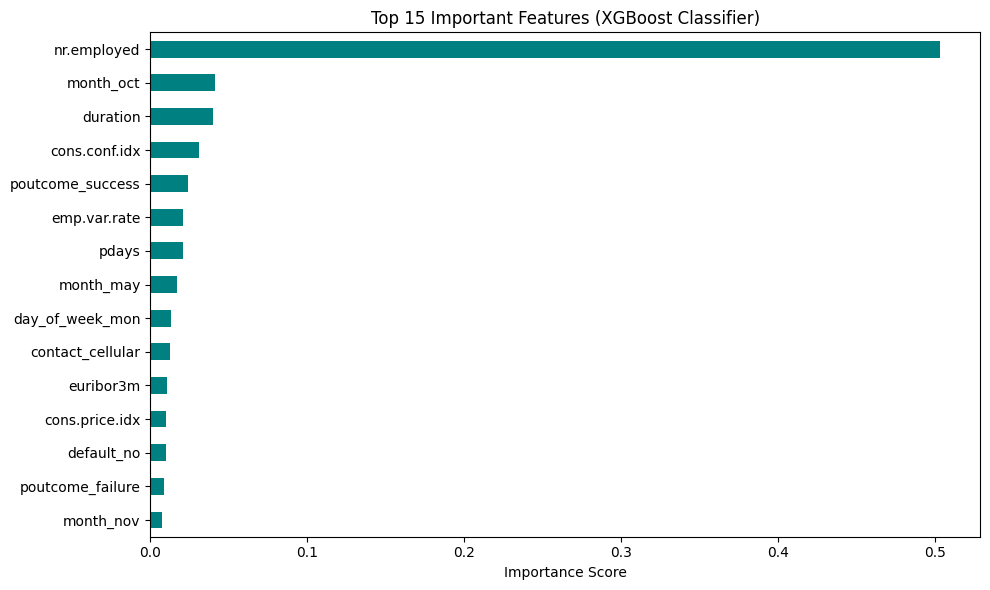

In [29]:
# Feature Importance
xgb_model = best_clf_pipeline.named_steps['classifier']
feature_names = best_clf_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(best_clf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols))
importances = xgb_model.feature_importances_

# Top 15 features
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
important_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features (XGBoost Classifier)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()